In [65]:
import time

import pandas as pd
import tensorflow as tf

from window import WindowGenerator
import utils

# Dataset

In [66]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [67]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]
num_features = case_1.shape[1]

In [68]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

# Model Creation

In [69]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 15
BATCH_SIZE = 32
features_size = len(label_columns)

In [70]:
print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s.")
print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 90s of data to predict 90s.
Using 1min 30s of data to predict 1min 30s into de future.


In [71]:
CONV_WIDTH = 3 # default 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

multi_conv_model.compile(loss=tf.losses.MeanSquaredError(),
                         optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.RootMeanSquaredError()])

# history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

# multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
# multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
# multi_window.plot(multi_conv_model)

In [72]:
exec_times = {}

In [73]:
results = {}

## Case 2

In [74]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)
exec_times['case_2'] = time.time() - start_t

2022-10-11 11:47:35.876392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 11:47:36.684150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [75]:
exec_times

{'case_2': 7.637749910354614}

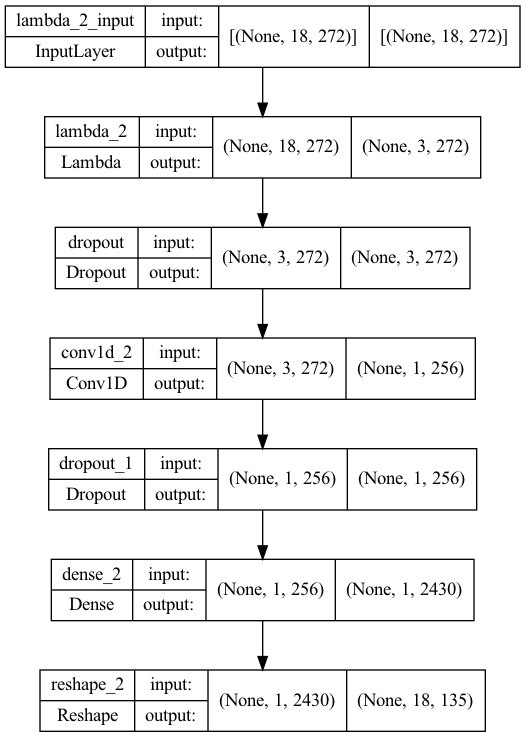

In [76]:
tf.keras.utils.plot_model(multi_conv_model, "../plots/models/multi_conv_model.png", show_shapes=True)

label_col_index 134
label_col_index 134
label_col_index 134


2022-10-11 11:47:43.833779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


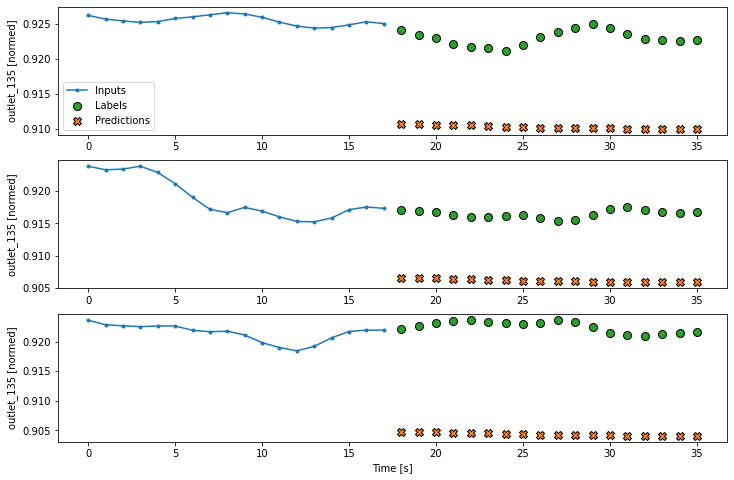

In [77]:
window.plot(multi_conv_model, plot_col="outlet_135")

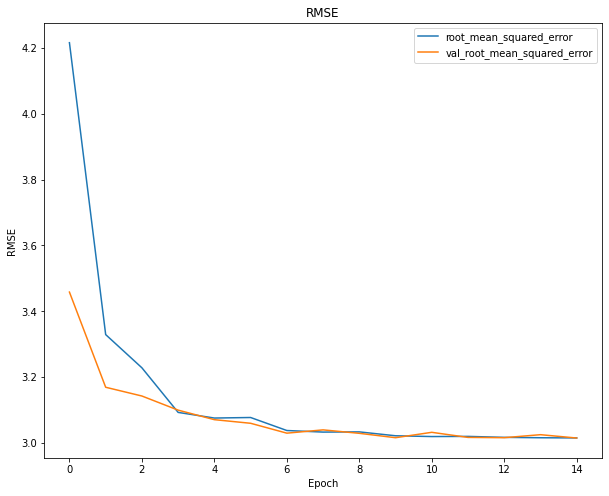

In [78]:
utils.plot_losses(history=history)

In [79]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [80]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_3'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


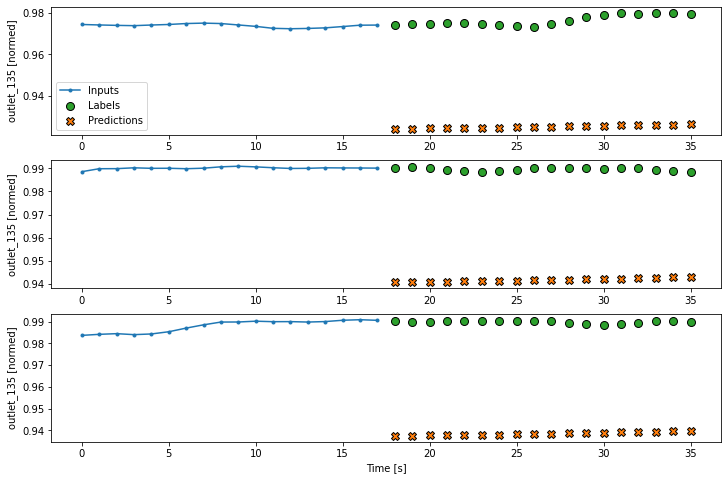

In [81]:
window.plot(multi_conv_model, plot_col="outlet_135")

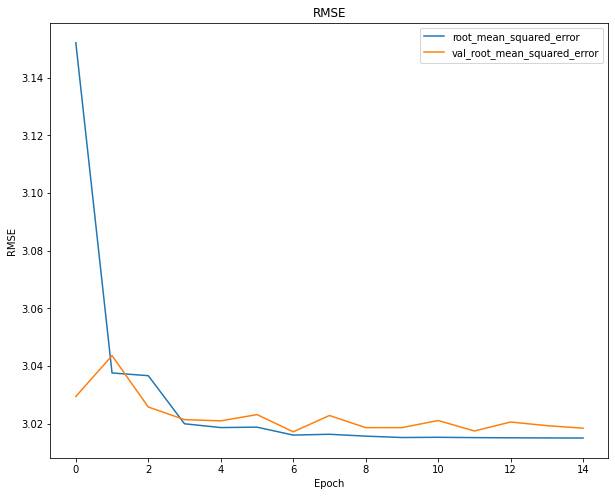

In [82]:
utils.plot_losses(history=history)

In [83]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [84]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_4'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


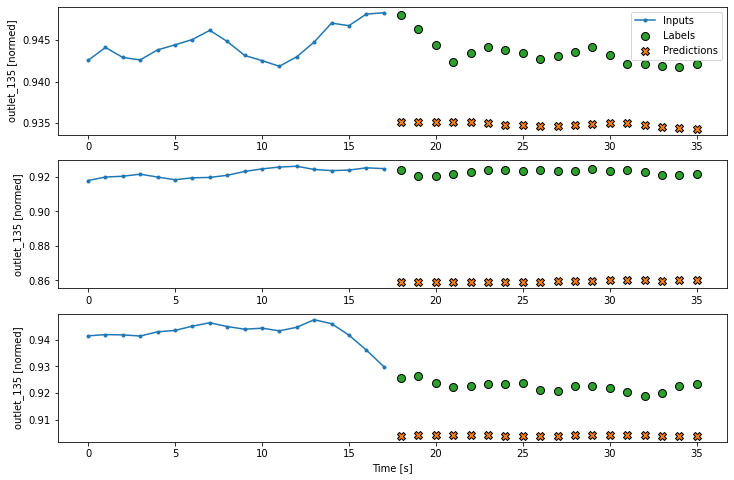

In [85]:
window.plot(multi_conv_model, plot_col="outlet_135")

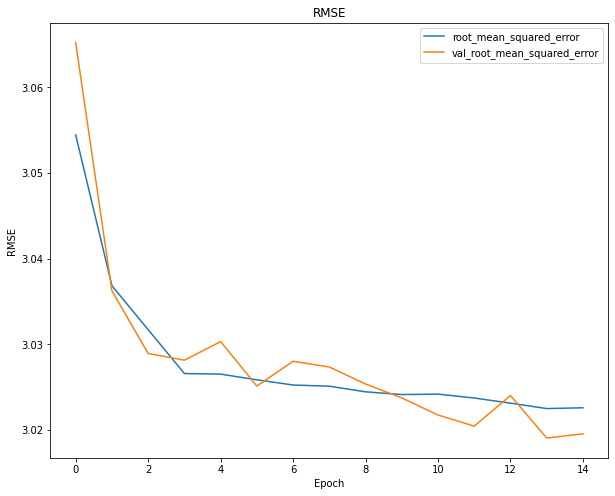

In [86]:
utils.plot_losses(history=history)

In [87]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [88]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_5'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


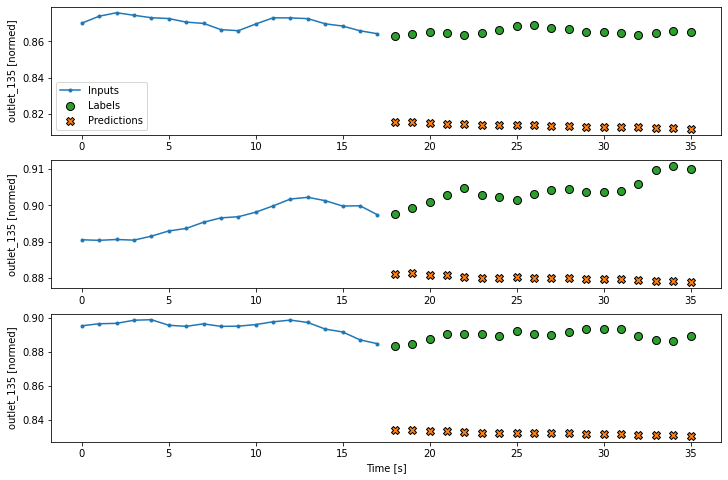

In [89]:
window.plot(multi_conv_model, plot_col="outlet_135")

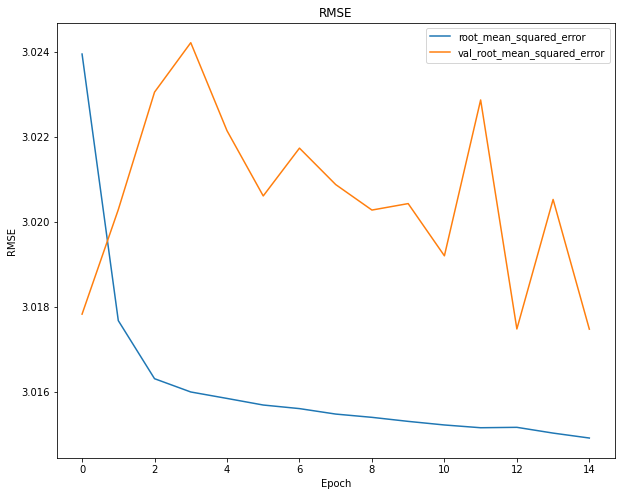

In [90]:
utils.plot_losses(history=history)

In [91]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [92]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_res = multi_conv_model.evaluate(window.train) # testing

5/5 [==============================] - 0s 8ms/step - loss: 0.0177 - root_mean_squared_error: 0.1471


In [93]:
results['test'] = {
    'loss': utils.inverse_transform_loss(test_res[0]),
    'rmse': utils.inverse_transform_rmse(test_res[1])
}

In [94]:
pd.DataFrame(results).transpose().round(4)

,loss,rmse,val_loss,val_rmse
case_2,9.0898,3.0153,9.0881,3.0150
case_3,9.0884,3.0150,9.1054,3.0184
case_4,9.1255,3.0226,9.1107,3.0196
case_5,9.0880,3.0149,9.1005,3.0175
test,9.5057,3.0984,NaN,NaN


In [95]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times_df.round(2)

,Time
case_2,7.64
case_3,6.85
case_4,7.24
case_5,8.07


In [96]:
print("Total training time: %.2fs" % exec_times_df['Time'].sum())

Total training time: 29.80s
